# Module Preparations

## Install Darts

In [1]:
# Install Darts 0.30.0
!pip install darts==0.30.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.3/917.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.5/890.5 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.5 MB/s eta 0:00:0

## import Libraries

In [2]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Darts functions
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.dataprocessing import Pipeline
from darts.metrics import mape, mse
from darts.models.forecasting.rnn_model import RNNModel

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
import warnings

warnings.filterwarnings('ignore')

## Mount Drive

In [4]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# change current working directory
%cd /content/drive/MyDrive/Colab Notebooks/Time-Series/LSTM/Multiple Time Series Forecasting

/content/drive/MyDrive/Colab Notebooks/Time-Series/LSTM/Multiple Time Series Forecasting


# Load Dataset From CSV File

In [6]:
# look into the data
data = pd.read_csv('preprocessed_data.csv')
data.sample(5)

,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,...,TS_405,TS_406,TS_407,TS_408,TS_409,TS_410,TS_411,TS_412,TS_413,TS_414
487,536.0,1978.0,1222.0,4270.0,2509.0,5948.0,39504.0,25334.0,28126.0,433.0,...,90.0,106.0,311.0,250.0,38.0,60.0,89.0,39.0,17.0,95.0
119,570.0,3337.0,1570.0,5355.0,2914.0,5955.0,36773.0,31491.0,38517.0,483.0,...,57.0,31.0,184.0,56.0,37.0,58.0,59.0,26.0,28.0,27.0
84,430.0,1515.0,970.0,3414.0,1652.0,6679.0,28479.0,19351.0,21501.0,415.0,...,264.0,74.0,627.0,277.0,104.0,97.0,151.0,90.0,39.0,470.0
189,838.0,2202.0,1756.0,5452.0,2435.0,6791.0,37576.0,39433.0,30445.0,505.0,...,68.0,64.0,221.0,105.0,50.0,45.0,44.0,35.0,31.0,58.0
268,661.0,2772.0,1165.0,5000.0,2281.0,4958.0,36971.0,28026.0,32878.0,440.0,...,44.0,18.0,44.0,94.0,24.0,32.0,43.0,15.0,18.0,28.0


# Data Preprocessings

## Choose a subset of Time Series from M4 Dataset
As we see, we have 960 independet time series data. Computing all of this time series in one go could be a painfull process.
In this Project, we just want to know the effectivity of different Time Series Model to forecast Multiple Univariate Time Series in one go. And without removing its complexity on coding and increasing the training time. We can choose only n numbers of samples from the entire M4 Dataset. In this case, we take only 10 samples


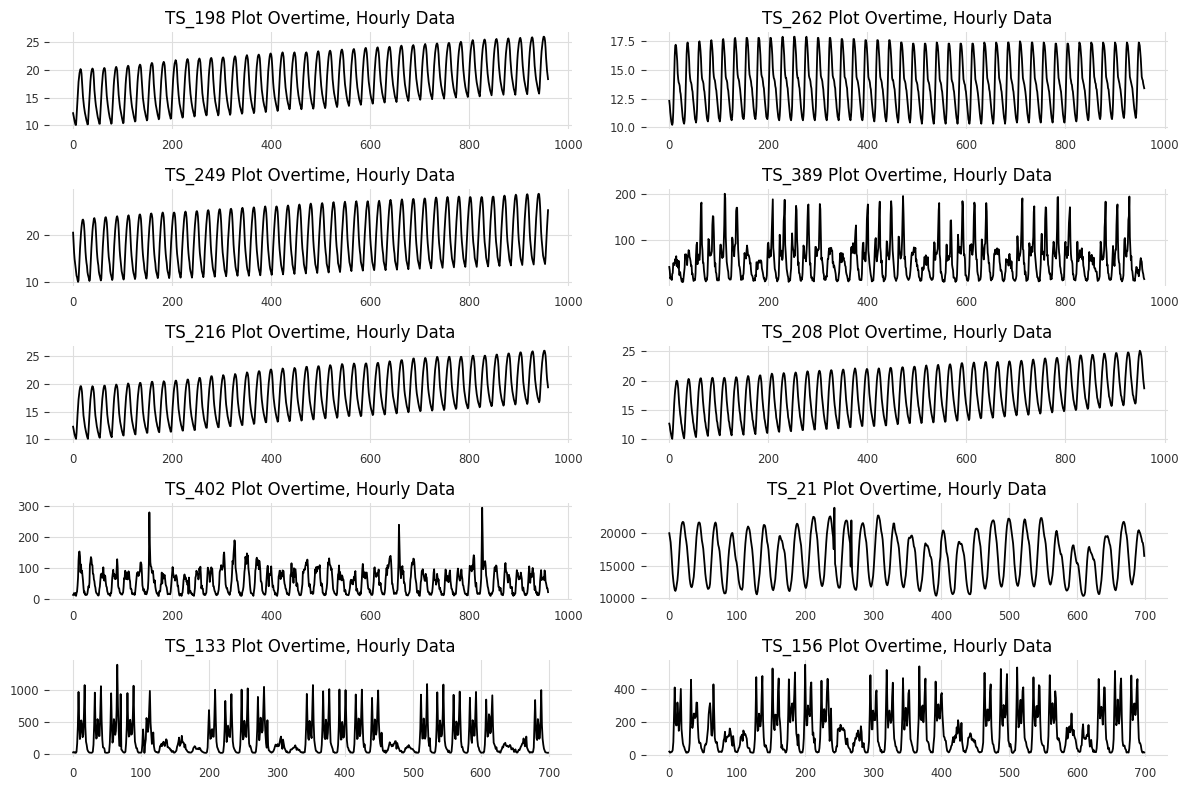

In [8]:
# specify random seed
seed = 0
random.seed(seed)

# take 10 random numbers between 1 and 960
random_series = random.sample(range(1, 414+1), 10)
random_series = [f'TS_{i}' for i in random_series]
random_series

# plot random 10 data
fig, ax = plt.subplots(5,2, figsize=(12, 8))

for i, col in enumerate(random_series):
  ax[i%5, i%2].plot(data[col])
  ax[i%5, i%2].set_title(f"{col} Plot Overtime, Hourly Data")

plt.tight_layout()

In [9]:
# see the results
print(f"take 10 random Series: {random_series}")

take 10 random Series: ['TS_198', 'TS_389', 'TS_216', 'TS_21', 'TS_133', 'TS_262', 'TS_249', 'TS_208', 'TS_402', 'TS_156']


We are ready to go

## Convert Into Time Series Object using Darts

In [10]:
# create multiple time series object
# in Darts, specify time_col = None will take dataframe index as the Time Index
# And specify value_cols = None will take all the columns to be Target
# And specify freq = 'h'

# we can create 960, single time series differently using list iterator with also dropping NaN values
multiple_series = [TimeSeries.from_series(data.loc[:, col].dropna(), freq=1) for col in random_series]

In [11]:
len(multiple_series)

10

## Devide Traning and Testing Data

In [12]:
# set the prediction horizon into the next 2 days (as the goals of M4 Competition)
forecasting_horizon = 24*2

# training data
train = [s[:-forecasting_horizon] for s in multiple_series]

# validation data
val = [s[-forecasting_horizon:] for s in multiple_series]

In [13]:
# see the extraction process
for i in train:
  print(len(i))

912
912
912
652
652
912
912
912
912
652


## Data Scaling

In [14]:
# create scaler
# scaling using MinMaxScaler (default in Darts)
scaler = Scaler()

# scale data on training and validation dat
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)

In [15]:
train_scaled

[<TimeSeries (DataArray) (time: 912, component: 1, sample: 1)> Size: 7kB
 array([[[0.13461538]],
 
        [[0.1025641 ]],
 
        [[0.07051282]],
 
        [[0.04487179]],
 
        [[0.01923077]],
 
        [[0.        ]],
 
        [[0.        ]],
 
        [[0.1025641 ]],
 
        [[0.22435897]],
 
        [[0.32692308]],
 
 ...
 
        [[0.99358974]],
 
        [[1.        ]],
 
        [[0.98076923]],
 
        [[0.94230769]],
 
        [[0.86538462]],
 
        [[0.75641026]],
 
        [[0.67307692]],
 
        [[0.60897436]],
 
        [[0.55769231]],
 
        [[0.51282051]]])
 Coordinates:
   * time       (time) int64 7kB 0 1 2 3 4 5 6 7 ... 905 906 907 908 909 910 911
   * component  (component) object 8B 'TS_198'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (time: 912, component: 1, sample: 1)> Size: 7kB
 array([[[0.16931217]],
 
        [[0.12698413]],
 
        [[0.03703704

# Modelling

## Plain Model (Multiple Univariate Time Series)

### Fitting Model

In [17]:
# defining inputs
input_chunk_length = forecasting_horizon*2                    # The number of data feeded to model
training_length = forecasting_horizon + input_chunk_length    # The number of training data

In [18]:
# LSTM model
model = RNNModel(model = "LSTM",                             # Specify LSTM model
                 hidden_dim = 20,                            # Number of hidden units
                 n_rnn_layers = 2,                           # Number of RNN layers
                 dropout = 0.1,                              # Dropout rate
                 n_epochs = 10,                              # Number of training epochs
                 optimizer_kwargs = {"lr": 0.003},           # Learning rate for the optimizer
                 random_state = 1502,                        # Random seed for reproducibility
                 training_length = training_length,          # Length of training data
                 input_chunk_length = input_chunk_length,    # Length of input chunks
                 pl_trainer_kwargs = {"accelerator": "cpu"}, # Use CPU for training
                 #pl_trainer_kwargs = {"accelerator": "gpu",
                 #                    "devices": [0]}  # Specify GPU device
                 )

# Fit the model with the transformed time series data and covariates
model.fit(train_scaled)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 5.2 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RNNModel(model=LSTM, hidden_dim=20, n_rnn_layers=2, dropout=0.1, training_length=144, n_epochs=10, optimizer_kwargs={'lr': 0.003}, random_state=1502, input_chunk_length=96, pl_trainer_kwargs={'accelerator': 'cpu'})

In [19]:
# save the first model
model.save("mini_pretrained_model.pkl")

### Cross Validation

In [20]:
# load pretrained model get from GPU
pretrained = RNNModel.load("mini_pretrained_model.pkl")

# load model into cpu, only if using GPU for training
pretrained.to_cpu()

In [23]:
# start period
start_period = 600
stride = 24

# Perform cross-validation using a rolling forecasting window
cv = pretrained.historical_forecasts(series = train_scaled,
                                     start = start_period,                    # Start point for forecasting window
                                     forecast_horizon = forecasting_horizon,  # Forecast horizon
                                     stride = stride,                         # Stride for rolling window
                                     retrain = False,                         # Not Retrain model at each step
                                     last_points_only = False,                # Use all points for forecasting
                                     show_warnings=False)                     # Whether or not to show warnings error

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [24]:
# scale back the cv
cv_back = scaler.inverse_transform(cv)

In [84]:
def calculate_loss(cv_back = cv_back,
                      actual = multiple_series,
                      start_period = start_period,
                      forecasting_horizon = forecasting_horizon,
                      stride = stride):

  # calculate cross validation error
  mse_res = []
  mape_res = []

  # loop algorithm:
  # loop over components:
  for idx_comp_series, comp_series in enumerate(cv_back):

    # define mse and mape component list
    mse_comp = []
    mape_comp = []

    # loop over cv:
    for idx_cv, cv_series in enumerate(comp_series):
      # find the actual series using slicing
      # formula for start period
      start_slice = start_period + (idx_cv*stride)
      # formula for end period
      end_slice = start_period + forecasting_horizon + (idx_cv*stride)
      # get the actual series
      actual = multiple_series[idx_comp_series][start_slice:end_slice]

      # calculate the error
      mse_loss_per_cv = mse(actual, cv_series)
      mape_loss_per_cv = mape(actual, cv_series)

      # append the result
      mse_comp.append(mse_loss_per_cv)
      mape_comp.append(mape_loss_per_cv)

    # append MSE_comp to MSE list
    mse_res.append(np.mean(mse_comp))
    mape_res.append(np.mean(mape_comp))

  return mse_res, mape_res

In [65]:
mse_res, mape_res = calculate_loss()

In [93]:
def visualize_loss(mse, mape, model_name="Plain Model"):
  # plot bar of mse
  fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 6))

  ax1.bar(x = random_series, height = mse_res, color = 'orange')
  ax2.bar(x = random_series, height = mape_res, color = 'orange')

  # display height labels on top center of each bar
  for i, v in enumerate(mse_res):
    ax1.text(i, v, str(round(v, 4)), ha='center', va='bottom')
  for i, v in enumerate(mape_res):
    ax2.text(i, v, f"{100*round(v, 4) :.1f}%", ha='center', va='bottom')

  # remove grids
  ax1.grid(False)
  ax2.grid(False)

  # create a label pics
  #ax1.set_xlabel("Series Name")
  ax1.set_ylabel("MSE")

  ax2.set_xlabel("Series Name")
  ax2.set_ylabel("MAPE")

  # remove y labels
  ax1.set_yticks([])
  ax2.set_yticks([])

  # create title
  fig.suptitle(f"Cross Validation Results for {model_name}")
  ax1.set_title("MSE")
  ax2.set_title("MAPE")

  fig.tight_layout()
  fig.show();


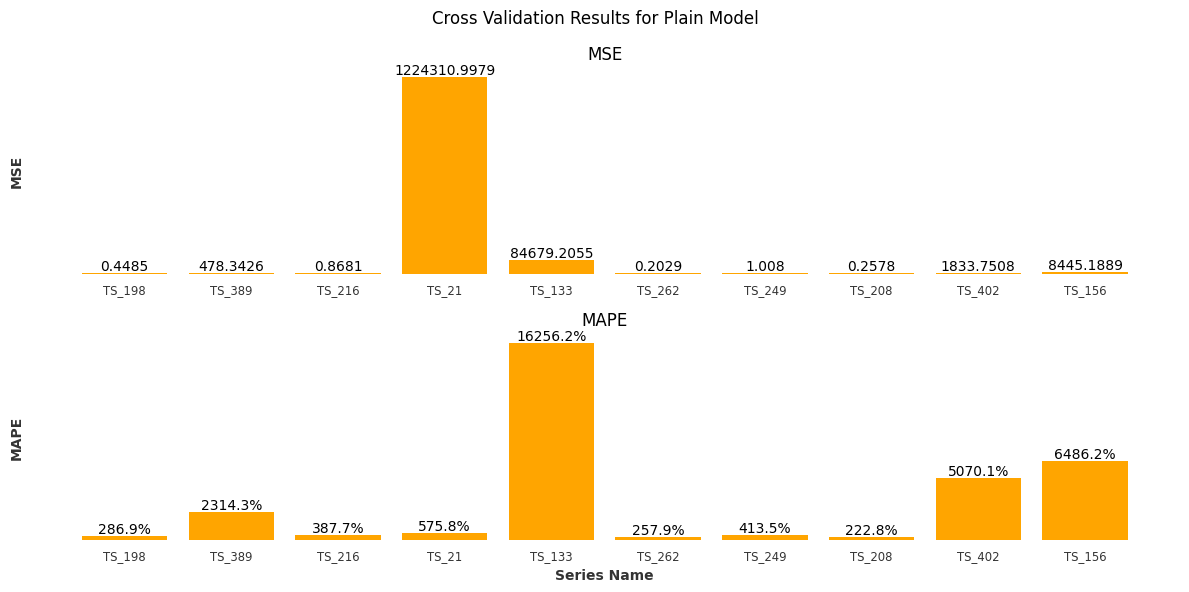

In [94]:
visualize_loss(mse_res, mape_res)

### Plot The Fitting Results

In [124]:
def visualize_prediction_cv(cv_back = cv_back,
                            train_series = train,
                            mse_res = mse_res,
                            mape_res = mape_res):
  # create figure
  fig, ax = plt.subplots(5,2, figsize=(12, 12))

  # loop over components
  for idx_comp, comp in enumerate(cv_back):
    # take the last cv
    last_cv = comp[-1]
    # take the actual
    actual = train_series[idx_comp]
    # plot
    actual.plot(ax = ax[idx_comp%5, idx_comp%2])
    last_cv.plot(ax = ax[idx_comp%5, idx_comp%2])

    # display title
    title = f"{random_series[idx_comp]}, Avg. CV MSE: {np.round(mse_res[idx_comp], 4) :.0f}, Avg. CV MAPE: {100*np.round(mape_res[idx_comp], 4) :.1f}%"
    ax[idx_comp%5, idx_comp%2].set_title(title)
    ax[idx_comp%5, idx_comp%2].legend([])

  fig.suptitle("Visualization of First Training and CV Lossess")
  fig.tight_layout()


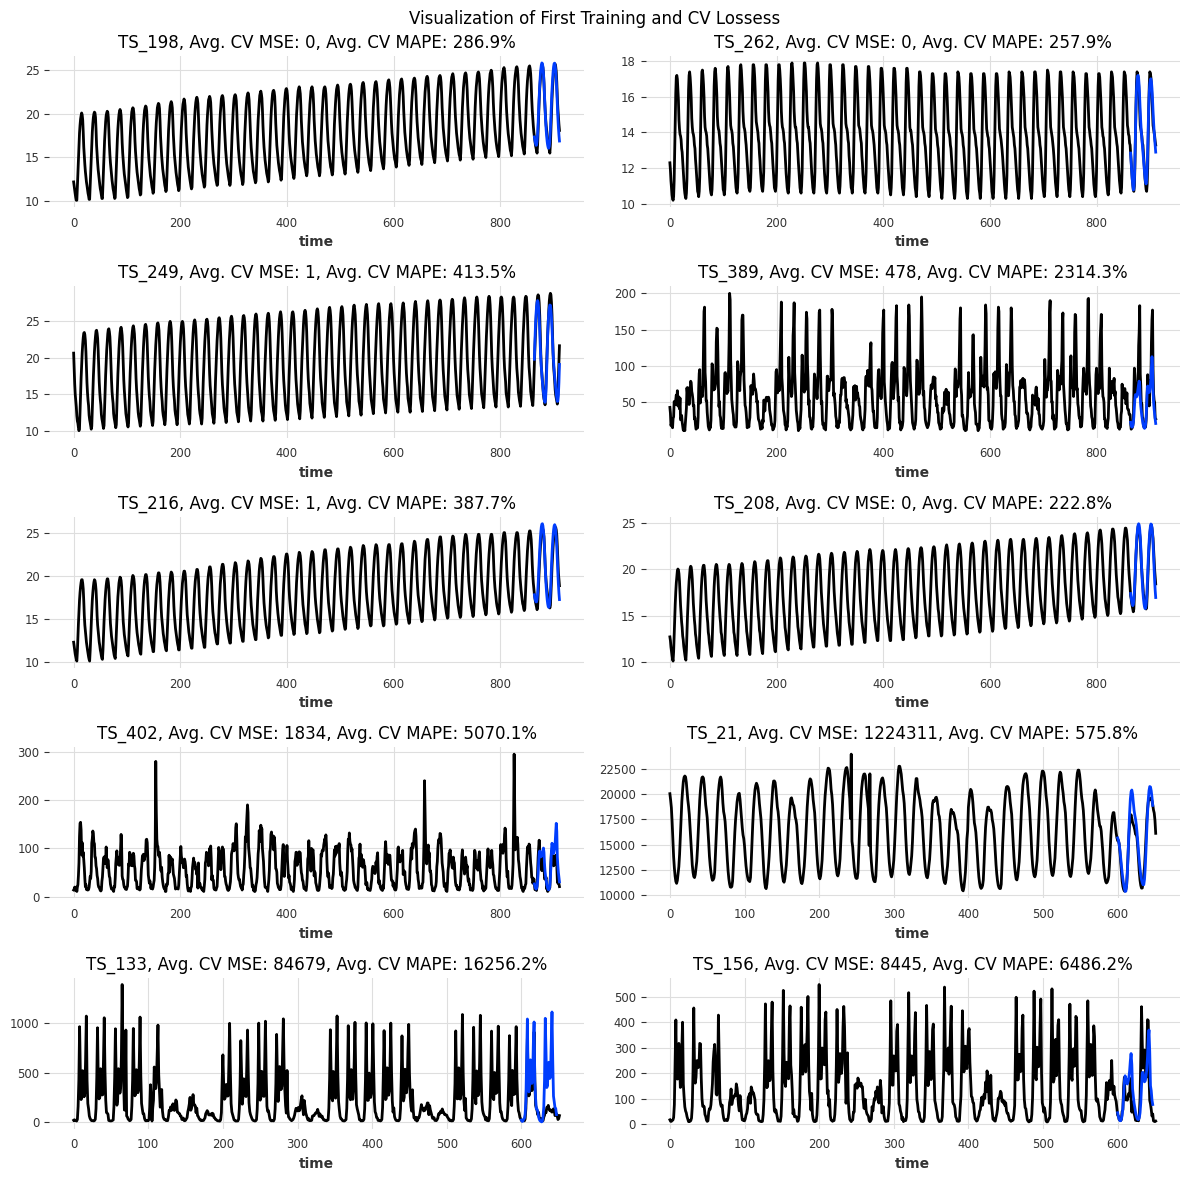

In [125]:
visualize_prediction_cv()

The resulted validations seems that LSTM cannot apprehend this data. Like from previous EDA, it seems that it is very challenging to predict.